In [164]:
#In Data Science, having domain knowledge can be 
#the key differentiating 
#factor between mediocre and great insights.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

In [165]:
#importing data
df = pd.read_csv("winequality.csv", sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


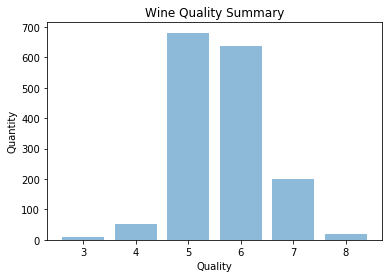

In [166]:
quality = np.sort(df.quality.unique())
count = []

for i in range(3,9):
    count.append(df.quality[df.quality==i].count())

plt.bar(quality,count,alpha=0.5)
plt.xlabel("Quality")
plt.ylabel("Quantity")
plt.title("Wine Quality Summary")

plt.show()


In [167]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [168]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


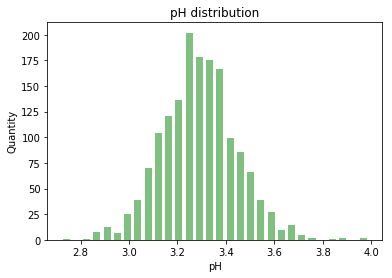

In [169]:
plt.hist(df.pH,bins=30,align='left',rwidth=0.7,color='green',alpha=0.5)
plt.xlabel("pH")
plt.ylabel("Quantity")
plt.title("pH distribution")
plt.show()

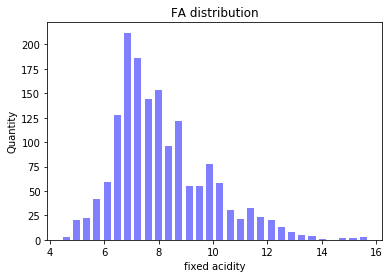

In [170]:
plt.hist(df['fixed acidity'],bins=30,align='left',rwidth=0.7,color='blue',alpha=0.5)
plt.xlabel("fixed acidity")
plt.ylabel("Quantity")
plt.title("FA distribution")
plt.show()

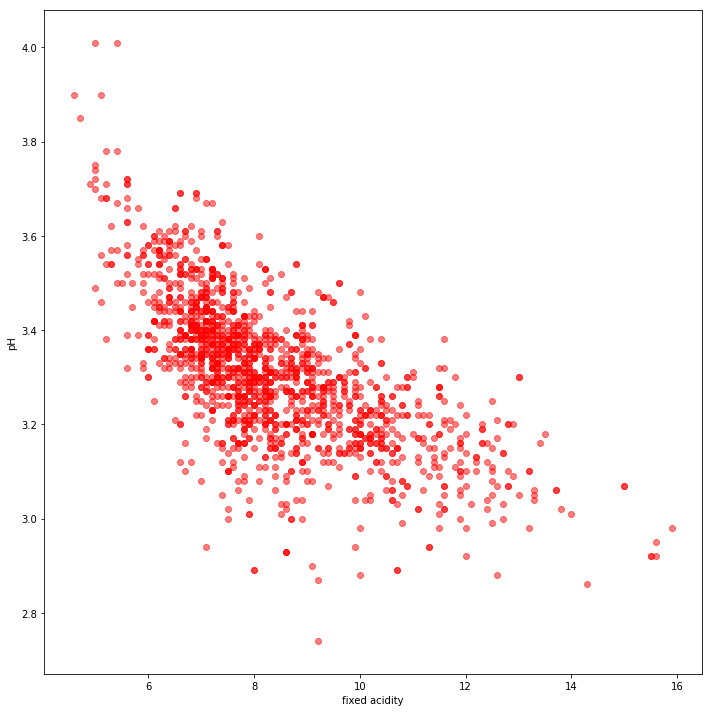

In [171]:
#This distribution makes sense
#as pH value is the indicator of acidity
#the lower it is the higher the acidity is

plt.figure(figsize = (10,10))

plt.scatter(df['fixed acidity'],df.pH,color='red',alpha=0.5)
plt.xlabel("fixed acidity")
plt.ylabel("pH")

plt.tight_layout()

plt.show()

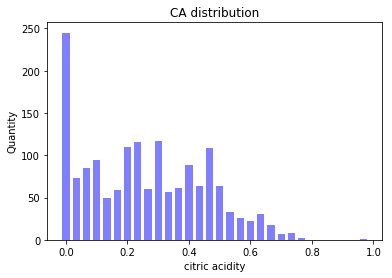

In [172]:
plt.hist(df["citric acid"],bins=30,align='left',rwidth=0.7,color='blue',alpha=0.5)

plt.xlabel("citric acidity")
plt.ylabel("Quantity")
plt.title("CA distribution")

plt.show()

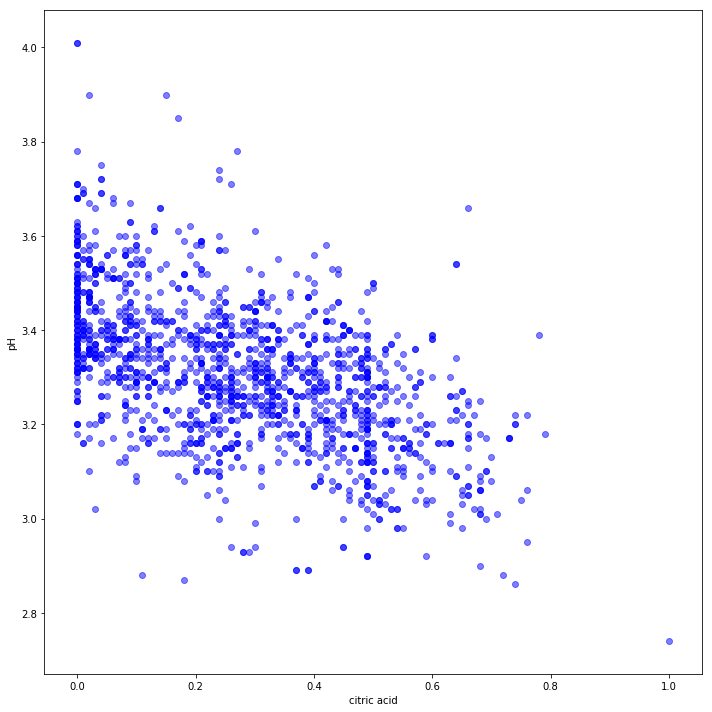

In [173]:
plt.figure(figsize = (10,10))

plt.scatter(df['citric acid'],df.pH,color='blue',alpha=0.5)
plt.xlabel("citric acid")
plt.ylabel("pH")

plt.tight_layout()

plt.show()

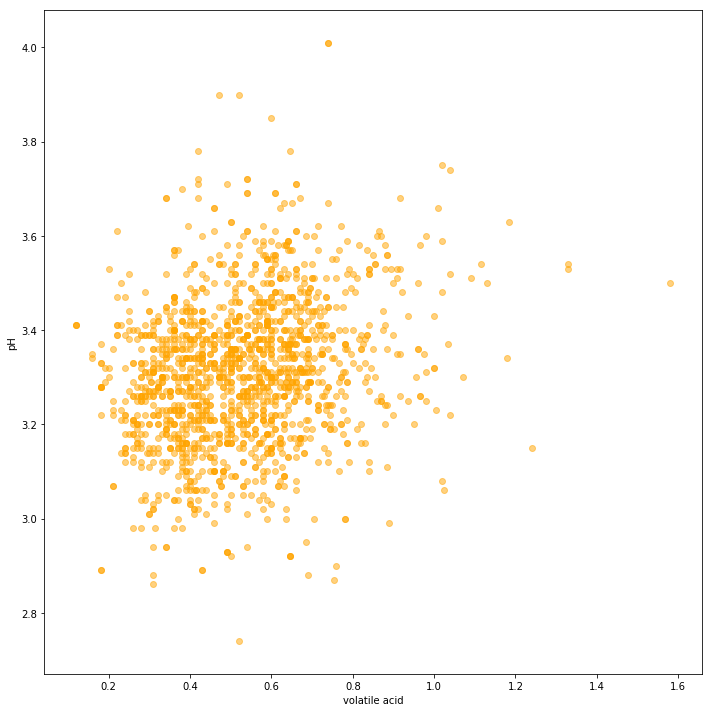

In [174]:
plt.figure(figsize = (10,10))

plt.scatter(df['volatile acidity'],df.pH,color='orange',alpha=0.5)
plt.xlabel("volatile acid")
plt.ylabel("pH")

plt.tight_layout()

plt.show()

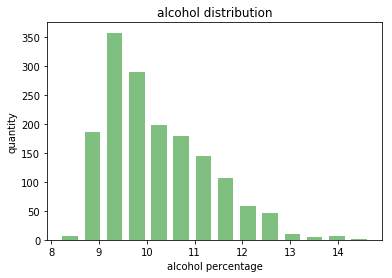

In [175]:
plt.hist(df.alcohol,bins=14,align='left',rwidth=0.7,color='green',alpha=0.5)

plt.title("alcohol distribution")
plt.xlabel("alcohol percentage")
plt.ylabel("quantity")

plt.show()

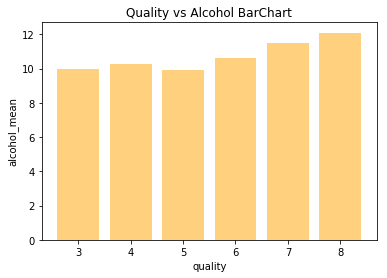

In [176]:
alcohol_average = []

for i in quality:
    alcohol_average.append(df.alcohol[df.quality==i].mean())
    
plt.bar(quality,alcohol_average,alpha=0.5,color='orange')

plt.xlabel("quality")
plt.ylabel("alcohol_mean")
plt.title("Quality vs Alcohol BarChart")

plt.show()

<BarContainer object of 3 artists>

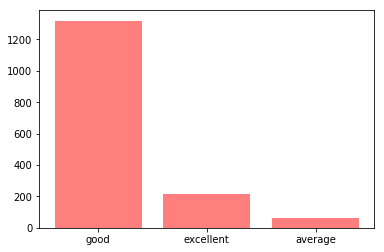

In [177]:
df = df.replace({"quality":[3,4]},"average")
df = df.replace({"quality":[5,6]},"good")
df = df.replace({"quality":[7,8]},"excellent")

quality = df.quality.unique()
count = []

for i in quality:
    count.append(df.quality[df.quality == i].count())

plt.bar(quality,count,alpha=0.5,color='red')    

In [178]:
#dummy variables in the dependent vector

dummy = pd.get_dummies(df.quality)

df = pd.concat([df,dummy],axis=1)
df = df.drop(["quality"],axis=1)

In [179]:
x = df.iloc[:,:-3].values
y = df.iloc[:,[-3,-2,-1]].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size = 0.2,
                                                 random_state = 0)

from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.transform(x_test)

In [180]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(output_dim = 6,init = "uniform",
                     activation = "relu",
                     input_dim = int(len(x[0]))))

classifier.add(Dense(output_dim = 6, init = "uniform",
                     activation = "relu"))

classifier.add(Dense(output_dim = 3, init = 'uniform',
                     activation = 'sigmoid'))

classifier.compile(optimizer = "adam",
                   loss = "binary_crossentropy",
                   metrics = ["accuracy"])
classifier.fit(x_train,y_train,
               batch_size = 5,
               epochs = 140)

/home/anton/Python_Conda/miniconda3/envs/snakes/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=11, units=6)`
  
/home/anton/Python_Conda/miniconda3/envs/snakes/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/anton/Python_Conda/miniconda3/envs/snakes/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3, activation="sigmoid", kernel_initializer="uniform")`
  


Epoch 1/140
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5318 - acc: 0.8762
Epoch 2/140
1279/1279 [==============================] - 1s 441us/step - loss: 0.3251 - acc: 0.8765
Epoch 3/140
1279/1279 [==============================] - 1s 415us/step - loss: 0.3150 - acc: 0.8765
Epoch 4/140
1279/1279 [==============================] - 1s 408us/step - loss: 0.3102 - acc: 0.8765
Epoch 5/140
1279/1279 [==============================] - 1s 413us/step - loss: 0.3078 - acc: 0.8765
Epoch 6/140
1279/1279 [==============================] - 1s 428us/step - loss: 0.3057 - acc: 0.8765
Epoch 7/140
1279/1279 [==============================] - 1s 425us/step - loss: 0.3033 - acc: 0.8765
Epoch 8/140
1279/1279 [==============================] - 1s 428us/step - loss: 0.3012 - acc: 0.8765
Epoch 9/140
1279/1279 [==============================] - 1s 431us/step - loss: 0.2987 - acc: 0.8765
Epoch 10/140
1279/1279 [==============================] - 1s 414us/step - loss: 0.2972 - acc: 0.8765
E

1279/1279 [==============================] - 0s 283us/step - loss: 0.2512 - acc: 0.9012
Epoch 82/140
1279/1279 [==============================] - 0s 312us/step - loss: 0.2514 - acc: 0.8984
Epoch 83/140
1279/1279 [==============================] - 0s 304us/step - loss: 0.2506 - acc: 0.9010
Epoch 84/140
1279/1279 [==============================] - 0s 356us/step - loss: 0.2499 - acc: 0.9007
Epoch 85/140
1279/1279 [==============================] - 0s 349us/step - loss: 0.2508 - acc: 0.8989
Epoch 86/140
1279/1279 [==============================] - 0s 346us/step - loss: 0.2506 - acc: 0.8991
Epoch 87/140
1279/1279 [==============================] - 0s 345us/step - loss: 0.2506 - acc: 0.8997
Epoch 88/140
1279/1279 [==============================] - 0s 319us/step - loss: 0.2504 - acc: 0.8994
Epoch 89/140
1279/1279 [==============================] - 0s 328us/step - loss: 0.2503 - acc: 0.9017
Epoch 90/140
1279/1279 [==============================] - 0s 341us/step - loss: 0.2500 - acc: 0.9012
Epo

In [181]:
y_pred = classifier.predict(x_test)
for i in range(len(y_pred)):
    a = y_pred[i][0]
    k = 0
    for j in range(len(y_pred[i])):
        if y_pred[i][j] > a:
            a = y_pred[i][j]
            k = j
    y_pred[i] = int(0)
    y_pred[i][k] = int(1)


In [182]:
y_test = y_test.argmax(axis = 1)
y_pred = y_pred.argmax(axis = 1)

In [183]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[  0   0  13]
 [  0  11  19]
 [  0  18 259]]


In [184]:
correct = 266
wrong = correct+22+19+13
print(100*correct/wrong)

83
